In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, os.path
import seaborn as sns

%matplotlib inline

In [4]:
# Reading in the datasets
df = pd.read_csv('demos_mirage.csv', index_col=0)
map_df = pd.read_csv('map_data.csv', index_col=0)

In [5]:
df.head()

,file,map,date,round,tick,seconds,att_team,vic_team,att_side,vic_side,...,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank
0,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,7392,115.9530,Team 1,Team 2,CounterTerrorist,Terrorist,...,76561198370068230,16,-359.5016,389.7257,-468.7209,529.1569,PISTOL_ROUND,4250,4200,15.0
1,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,7394,115.9842,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198115686363,16,-650.1707,520.0313,-352.4009,392.1384,PISTOL_ROUND,4250,4200,15.0
2,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,7404,116.1405,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198115686363,16,-650.1707,520.0313,-335.1208,401.2988,PISTOL_ROUND,4250,4200,15.0
3,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,8154,127.8608,Team 1,Team 2,CounterTerrorist,Terrorist,...,76561198301910020,13,-2064.0290,793.1069,-1575.5010,685.9157,PISTOL_ROUND,4250,4200,15.0
4,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,8162,127.9858,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198152153688,16,-1090.8520,677.1235,-2063.8480,793.9529,PISTOL_ROUND,4250,4200,15.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267436 entries, 0 to 267435
Data columns (total 32 columns):
file               267436 non-null object
map                267436 non-null object
date               267436 non-null object
round              267436 non-null int64
tick               267436 non-null int64
seconds            267436 non-null float64
att_team           267436 non-null object
vic_team           267436 non-null object
att_side           267436 non-null object
vic_side           267436 non-null object
hp_dmg             267436 non-null int64
arm_dmg            267436 non-null int64
is_bomb_planted    267436 non-null bool
bomb_site          45420 non-null object
hitbox             267436 non-null object
wp                 267436 non-null object
wp_type            267436 non-null object
award              267436 non-null int64
winner_team        267436 non-null object
winner_side        267436 non-null object
att_id             267436 non-null int64
att_rank       

In [7]:
df['is_bomb_planted'].value_counts()

False    222016
True      45420
Name: is_bomb_planted, dtype: int64

In [8]:
df['bomb_site'].value_counts()

A    24259
B    21161
Name: bomb_site, dtype: int64

In [9]:
map_df.head()

,EndX,EndY,ResX,ResY,StartX,StartY
de_cache,3752,3187,1024,1024,-2031,-2240
de_cbble,2282,3032,1024,1024,-3819,-3073
de_dust2,2127,3455,1024,1024,-2486,-1150
de_inferno,2797,3800,1024,1024,-1960,-1062
de_mirage,1912,1682,1024,1024,-3217,-3401


In [10]:
md = map_df.loc[df['map']]

In [11]:
md

,EndX,EndY,ResX,ResY,StartX,StartY
de_mirage,1912,1682,1024,1024,-3217,-3401
de_mirage,1912,1682,1024,1024,-3217,-3401
de_mirage,1912,1682,1024,1024,-3217,-3401
de_mirage,1912,1682,1024,1024,-3217,-3401
de_mirage,1912,1682,1024,1024,-3217,-3401
de_mirage,1912,1682,1024,1024,-3217,-3401
de_mirage,1912,1682,1024,1024,-3217,-3401
de_mirage,1912,1682,1024,1024,-3217,-3401
de_mirage,1912,1682,1024,1024,-3217,-3401
de_mirage,1912,1682,1024,1024,-3217,-3401


In [12]:
# Adding damage instance coordinates to map coordinates

md[['att_pos_x', 'att_pos_y', 'vic_pos_x', 'vic_pos_y']] = (df.set_index('map')[['att_pos_x', 'att_pos_y', 'vic_pos_x', 'vic_pos_y']])

/Users/sverrelillelien/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2450: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [13]:
md

,EndX,EndY,ResX,ResY,StartX,StartY,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y
de_mirage,1912,1682,1024,1024,-3217,-3401,-359.50160,389.7257,-468.72090,529.1569
de_mirage,1912,1682,1024,1024,-3217,-3401,-650.17070,520.0313,-352.40090,392.1384
de_mirage,1912,1682,1024,1024,-3217,-3401,-650.17070,520.0313,-335.12080,401.2988
de_mirage,1912,1682,1024,1024,-3217,-3401,-2064.02900,793.1069,-1575.50100,685.9157
de_mirage,1912,1682,1024,1024,-3217,-3401,-1090.85200,677.1235,-2063.84800,793.9529
de_mirage,1912,1682,1024,1024,-3217,-3401,-1121.63300,789.5677,-2384.64500,652.6794
de_mirage,1912,1682,1024,1024,-3217,-3401,-1991.05500,785.1800,-2344.55700,407.4690
de_mirage,1912,1682,1024,1024,-3217,-3401,-1015.16700,348.6126,-730.51440,462.0178
de_mirage,1912,1682,1024,1024,-3217,-3401,-728.09800,458.2229,-1008.21900,347.5916
de_mirage,1912,1682,1024,1024,-3217,-3401,-2041.83300,823.1028,-2308.93900,378.9878


In [14]:
md['att_pos_x'] = (md['ResX']*(md['att_pos_x']-md['StartX']))/(md['EndX']-md['StartX'])
md['att_pos_y'] = (md['ResY']*(md['att_pos_y']-md['StartY']))/(md['EndY']-md['StartY'])
md['vic_pos_x'] = (md['ResX']*(md['vic_pos_x']-md['StartX']))/(md['EndX']-md['StartX'])
md['vic_pos_y'] = (md['ResY']*(md['vic_pos_y']-md['StartY']))/(md['EndY']-md['StartY'])
df[['att_pos_x', 'att_pos_y', 'vic_pos_x', 'vic_pos_y']] = md[['att_pos_x', 'att_pos_y', 'vic_pos_x', 'vic_pos_y']].values

/Users/sverrelillelien/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/sverrelillelien/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sverrelillelien/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [15]:
df.head()

,file,map,date,round,tick,seconds,att_team,vic_team,att_side,vic_side,...,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank
0,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,7392,115.9530,Team 1,Team 2,CounterTerrorist,Terrorist,...,76561198370068230,16,570.496853,763.663804,548.691324,791.753033,PISTOL_ROUND,4250,4200,15.0
1,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,7394,115.9842,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198115686363,16,512.465043,789.914627,571.914502,764.149857,PISTOL_ROUND,4250,4200,15.0
2,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,7404,116.1405,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198115686363,16,512.465043,789.914627,575.364457,765.995273,PISTOL_ROUND,4250,4200,15.0
3,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,8154,127.8608,Team 1,Team 2,CounterTerrorist,Terrorist,...,76561198301910020,13,230.189570,844.927300,327.723723,823.333007,PISTOL_ROUND,4250,4200,15.0
4,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,8162,127.9858,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198152153688,16,424.483438,821.561767,230.225706,845.097732,PISTOL_ROUND,4250,4200,15.0


In [28]:
avail_pistols = ['USP', 'Glock', 'P2000', 'P250', 'Tec9', 'FiveSeven', 'Deagle', 'DualBarettas', 'CZ']

df_pistol = df[(df['round'].isin([1,16])) & (df['wp'].isin(avail_pistols))]

In [39]:
df_pistol

,file,map,date,round,tick,seconds,att_team,vic_team,att_side,vic_side,...,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank
0,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,7392,115.9530,Team 1,Team 2,CounterTerrorist,Terrorist,...,76561198370068230,16,570.496853,763.663804,548.691324,791.753033,PISTOL_ROUND,4250,4200,15.0
1,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,7394,115.9842,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198115686363,16,512.465043,789.914627,571.914502,764.149857,PISTOL_ROUND,4250,4200,15.0
2,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,7404,116.1405,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198115686363,16,512.465043,789.914627,575.364457,765.995273,PISTOL_ROUND,4250,4200,15.0
3,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,8154,127.8608,Team 1,Team 2,CounterTerrorist,Terrorist,...,76561198301910020,13,230.189570,844.927300,327.723723,823.333007,PISTOL_ROUND,4250,4200,15.0
4,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,8162,127.9858,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198152153688,16,424.483438,821.561767,230.225706,845.097732,PISTOL_ROUND,4250,4200,15.0
5,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,8326,130.5487,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198073535347,16,418.338040,844.214307,166.178889,816.637361,PISTOL_ROUND,4250,4200,15.0
6,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,8790,137.7997,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198073535347,16,244.758760,843.330380,174.182420,767.238295,PISTOL_ROUND,4250,4200,15.0
7,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,8814,138.1747,Team 1,Team 2,CounterTerrorist,Terrorist,...,76561198355692407,17,439.593876,755.381330,496.424499,778.227469,PISTOL_ROUND,4250,4200,15.0
8,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,8828,138.3935,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198062948330,14,496.906931,777.462965,440.981038,755.175644,PISTOL_ROUND,4250,4200,15.0
9,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,8842,138.6123,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198073535347,16,234.620980,850.970149,181.293520,761.500592,PISTOL_ROUND,4250,4200,15.0


In [56]:
def plot_heatmap(map_played, df):
    """Function for plotting a heatmap of player positions
       at the time of damage, on a given map.
       
       INPUT:
       map_played: name of map, eg. de_train, de_mirage
       df: dataframe to be plotted, eg. df_rifle, df_pistols
       
       OUTPUT:
       Heatmap of CT (left) and T (right) positions as they
       damage opponent."""
    
    map_played = map_played
    map_bg = plt.imread('./map_imgs/'+map_played+'.png')
    
    # Setting up graph
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,16))
    ax1.grid(b=True, which='major', color='w', linestyle='--', alpha=0.25)
    ax2.grid(b=True, which='major', color='w', linestyle='--', alpha=0.25)
    ax1.imshow(bg, zorder=0, extent=[0.0, 1024, 0.0, 1024])
    ax2.imshow(bg, zorder=0, extent=[0.0, 1024, 0.0, 1024])
    plt.xlim(0, 1024)
    plt.ylim(0, 1024)
    
    # Plotting CT side
    plot_df = df.loc[(df.map == map_played) & (df.att_side == 'CounterTerrorist')]
    sns.kdeplot(plot_df['att_pos_x'], plot_df['att_pos_y'], cmap='Blues', bw=15, ax=ax1)
    ax1.set_title('Counter-Terrorist Attacking')
    
    # Plotting T side  
    plot_df = df.loc[(df.map == map_played) & (df.att_side == 'Terrorist')]
    sns.kdeplot(plot_df['att_pos_x'], plot_df['att_pos_y'], cmap='YlOrRd', bw=15, ax=ax2)
    ax2.set_title('Terrorist Attacking')
    

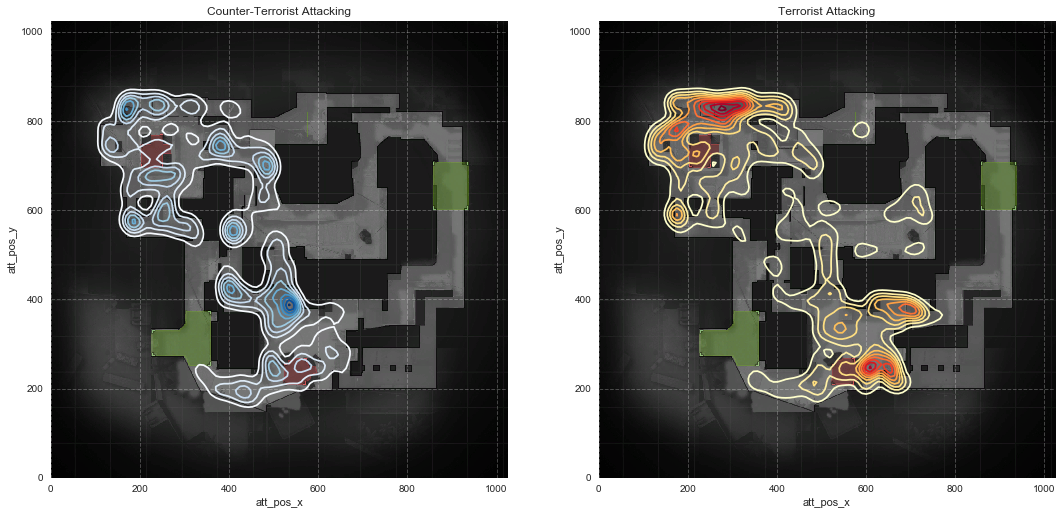

In [57]:
plot_heatmap('de_mirage', df_pistol)

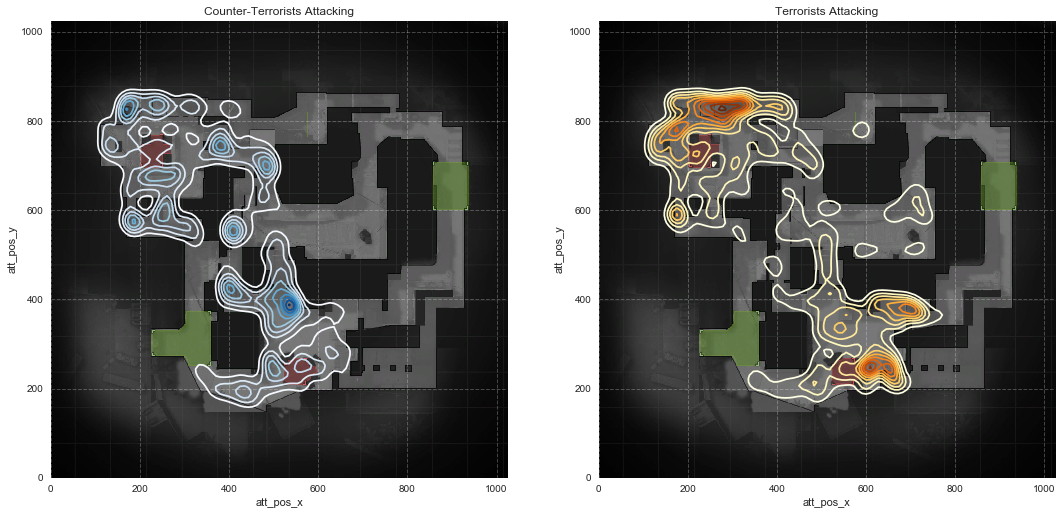

In [55]:
smap = 'de_mirage'

bg = plt.imread('./map_imgs/'+smap+'.png')
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,16))
ax1.grid(b=True, which='major', color='w', linestyle='--', alpha=0.25)
ax2.grid(b=True, which='major', color='w', linestyle='--', alpha=0.25)
ax1.imshow(bg, zorder=0, extent=[0.0, 1024, 0., 1024])
ax2.imshow(bg, zorder=0, extent=[0.0, 1024, 0., 1024])
plt.xlim(0,1024)
plt.ylim(0,1024)

plot_df = df_pistol.loc[(df_pistol.map == smap) & (df_pistol.att_side == 'CounterTerrorist')]
sns.kdeplot(plot_df['att_pos_x'], plot_df['att_pos_y'], cmap='Blues', bw=15, ax=ax1)
ax1.set_title('Counter-Terrorists Attacking')

plot_df = df_pistol.loc[(df_pistol.map == smap) & (df_pistol.att_side == 'Terrorist')]
sns.kdeplot(plot_df['att_pos_x'], plot_df['att_pos_y'], cmap='YlOrBr', bw=15, ax=ax2)
ax2.set_title('Terrorists Attacking')


In [40]:
rifles = ['AK47', 'M4A4', 'AWP']

df_rifle = df[(df['wp'].isin(rifles))]

In [36]:
df

,file,map,date,round,tick,seconds,att_team,vic_team,att_side,vic_side,...,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank
0,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,7392,115.9530,Team 1,Team 2,CounterTerrorist,Terrorist,...,76561198370068230,16,570.496853,763.663804,548.691324,791.753033,PISTOL_ROUND,4250,4200,15.0
1,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,7394,115.9842,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198115686363,16,512.465043,789.914627,571.914502,764.149857,PISTOL_ROUND,4250,4200,15.0
2,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,7404,116.1405,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198115686363,16,512.465043,789.914627,575.364457,765.995273,PISTOL_ROUND,4250,4200,15.0
3,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,8154,127.8608,Team 1,Team 2,CounterTerrorist,Terrorist,...,76561198301910020,13,230.189570,844.927300,327.723723,823.333007,PISTOL_ROUND,4250,4200,15.0
4,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,8162,127.9858,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198152153688,16,424.483438,821.561767,230.225706,845.097732,PISTOL_ROUND,4250,4200,15.0
5,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,8326,130.5487,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198073535347,16,418.338040,844.214307,166.178889,816.637361,PISTOL_ROUND,4250,4200,15.0
6,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,8790,137.7997,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198073535347,16,244.758760,843.330380,174.182420,767.238295,PISTOL_ROUND,4250,4200,15.0
7,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,8814,138.1747,Team 1,Team 2,CounterTerrorist,Terrorist,...,76561198355692407,17,439.593876,755.381330,496.424499,778.227469,PISTOL_ROUND,4250,4200,15.0
8,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,8828,138.3935,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198062948330,14,496.906931,777.462965,440.981038,755.175644,PISTOL_ROUND,4250,4200,15.0
9,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,8842,138.6123,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198073535347,16,234.620980,850.970149,181.293520,761.500592,PISTOL_ROUND,4250,4200,15.0


In [41]:
df_rifle

,file,map,date,round,tick,seconds,att_team,vic_team,att_side,vic_side,...,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank
68,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,4,25105,392.7087,Team 1,Team 2,CounterTerrorist,Terrorist,...,76561198237972336,15,397.043871,436.487101,607.084978,270.775375,NORMAL,16200,22700,15.0
75,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,4,25595,400.3660,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198115686363,16,491.799409,392.568521,517.151764,474.526193,NORMAL,16200,22700,15.0
76,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,4,26317,411.6487,Team 1,Team 2,CounterTerrorist,Terrorist,...,76561198370068230,16,410.529965,641.898903,408.392123,519.974992,NORMAL,16200,22700,15.0
77,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,4,26323,411.7425,Team 1,Team 2,CounterTerrorist,Terrorist,...,76561198370068230,16,410.529965,641.898903,408.121998,520.646847,NORMAL,16200,22700,15.0
78,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,4,26339,411.9925,Team 1,Team 2,CounterTerrorist,Terrorist,...,76561198370068230,16,410.529965,641.898903,407.510872,521.852097,NORMAL,16200,22700,15.0
79,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,4,27473,429.7137,Team 1,Team 2,CounterTerrorist,Terrorist,...,76561198301910020,13,536.206050,393.792164,590.181871,204.416227,NORMAL,16200,22700,15.0
80,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,4,27479,429.8074,Team 1,Team 2,CounterTerrorist,Terrorist,...,76561198301910020,13,536.206050,393.792164,590.432610,204.548180,NORMAL,16200,22700,15.0
81,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,4,27495,430.0575,Team 1,Team 2,CounterTerrorist,Terrorist,...,76561198301910020,13,536.206050,393.792164,590.060924,204.341285,NORMAL,16200,22700,15.0
82,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,4,27501,430.1512,Team 1,Team 2,CounterTerrorist,Terrorist,...,76561198301910020,13,536.206050,393.792164,590.332127,204.495802,NORMAL,16200,22700,15.0
83,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,4,27729,433.7142,Team 1,Team 2,CounterTerrorist,Terrorist,...,76561198324785976,15,601.233704,308.952666,640.310506,379.101803,NORMAL,16200,22700,15.0


In [43]:
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

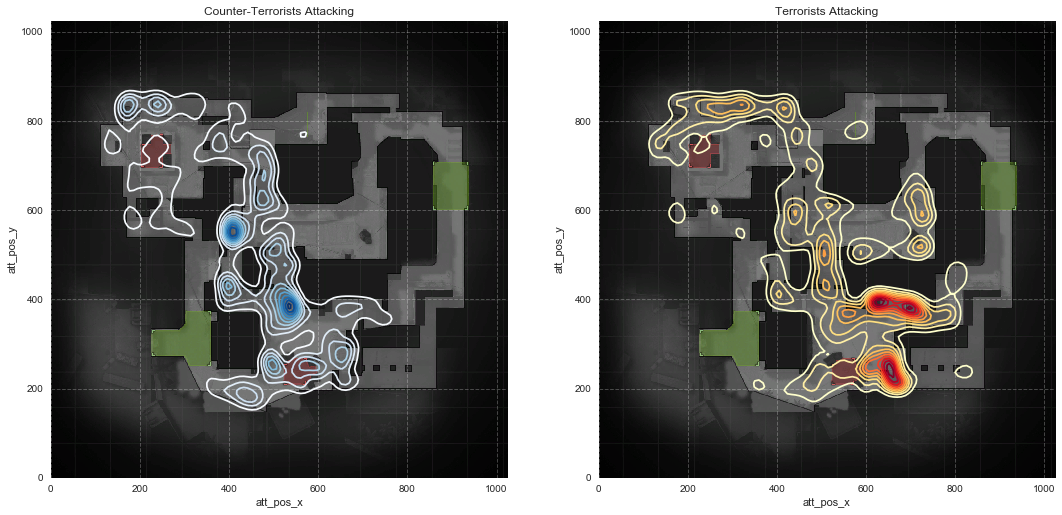

In [48]:
smap = 'de_mirage'

bg = plt.imread('./map_imgs/'+smap+'.png')
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,16))
ax1.grid(b=True, which='major', color='w', linestyle='--', alpha=0.25)
ax2.grid(b=True, which='major', color='w', linestyle='--', alpha=0.25)
ax1.imshow(bg, zorder=0, extent=[0.0, 1024, 0., 1024])
ax2.imshow(bg, zorder=0, extent=[0.0, 1024, 0., 1024])
plt.xlim(0,1024)
plt.ylim(0,1024)

plot_df = df_rifle.loc[(df_rifle.map == smap) & (df_rifle.att_side == 'CounterTerrorist')]
sns.kdeplot(plot_df['att_pos_x'], plot_df['att_pos_y'], cmap='Blues', bw=15, ax=ax1)
ax1.set_title('Counter-Terrorists Attacking')

plot_df = df_rifle.loc[(df_rifle.map == smap) & (df_rifle.att_side == 'Terrorist')]
sns.kdeplot(plot_df['att_pos_x'], plot_df['att_pos_y'], cmap='YlOrRd', bw=15, ax=ax2)
ax2.set_title('Terrorists Attacking')